In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from functions import *
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# Define the file path
file_path = '/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/Shortest_Path_Matrix.csv'

# Read the CSV file into a DataFrame, specifying the separator as ';' and setting data types for index and headers
distances = (pd.read_csv(file_path, sep=';', index_col=0, dtype={'origins': str}))/1000

# Example of accessing shortest path between two GeoUID values
origin_geo_uid = '4620149'  # Ensure GeoUIDs are treated as strings
destination_geo_uid = '4620222'

# Find shortest path
try:
    shortest_path = distances.loc[origin_geo_uid, destination_geo_uid]
    print(f"Shortest path from GeoUID {origin_geo_uid} to GeoUID {destination_geo_uid}: {shortest_path}")
except KeyError:
    print("One or both of the GeoUIDs not found.")

In [ ]:
# Assuming df_shortest_paths is your existing DataFrame from Shortest_Path_Matrix.csv
file_path_shortest_paths = '/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/Shortest_Path_Matrix.csv'
df_shortest_paths = pd.read_csv(file_path_shortest_paths, sep=';', index_col=0, dtype={'origins': str})

# Extract all unique GeoUIDs from the shortest path DataFrame
geo_uids = df_shortest_paths.index.tolist()

# Example number of hours in a day
hours_experiment = 28  

# Create an empty DataFrame to store hourly passenger demand matrices
passenger_demand = {}

# Example of reading passenger demand files for each hour and filling empty_matrix
for hour in range(hours_experiment):
    # Example file path for passenger demand data for each hour
    file_path_demand = f'/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/24_1hour_od/car_{hour}h.csv'

    # Read passenger demand data for the current hour
    df_demand_hour = pd.read_csv(file_path_demand, sep=',', index_col=0, dtype={'origins': str})

    # Create an empty matrix for the current hour with float dtype
    empty_matrix = pd.DataFrame(0.0, index=geo_uids, columns=geo_uids)

    # Fill empty_matrix for the current hour
    for origin, row in df_demand_hour.iterrows():
        origin = str(origin)
        if origin.endswith('.0'):
            origin = origin[:-2]  # Remove the '.0' suffix if it exists
        for destination, demand in row.items():
            destination = str(destination)
            if destination.endswith('.0'):
                destination = destination[:-2]  # Remove the '.0' suffix if it exists
            if origin in empty_matrix.index and destination in empty_matrix.columns:
                if pd.notna(demand):
                    empty_matrix.at[origin, destination] = round(demand)
    
    # Store the filled DataFrame in the hourly_dfs dictionary
    passenger_demand[hour] = empty_matrix

# Iterate through the dictionary and print the non-zero values
for hour, df in passenger_demand.items():
    print(f"Non-zero values for hour {hour}:")
    non_zero_values = df[df != 0].stack()  # Stack to get a Series of non-zero values
    print(non_zero_values)


In [ ]:
# Iterate through the dictionary and calculate the sum of non-zero values
for hour, df in passenger_demand.items():
    non_zero_sum = df[df != 0].sum().sum()  # Sum all non-zero values
    print(f"Sum of non-zero values for hour {hour}: {non_zero_sum}")

In [ ]:
# Calculate the number of commutes per hour
commutes_per_hour = []

for hour, df in passenger_demand.items():
    # Count the number of non-zero entries in the DataFrame
    number_pasengers = df[df != 0].sum().sum()
    commutes_per_hour.append(number_pasengers)

# Plotting the number of commutes per hour
plt.figure(figsize=(10, 6))
plt.bar(range(hours_experiment), commutes_per_hour, color='blue')
plt.xlabel('Hour')
plt.ylabel('Passengers')
plt.title('Number of Passengers per Hour')
plt.xticks(range(hours_experiment))  # Set x-axis ticks to match hours
plt.grid(axis='y')
plt.show()

In [ ]:
def passenger_demand(file_path_shortest_paths='/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/Shortest_Path_Matrix.csv', hours_experiment=28, plot=True):
    # Assuming df_shortest_paths is your existing DataFrame from Shortest_Path_Matrix.csv
    df_shortest_paths = pd.read_csv(file_path_shortest_paths, sep=';', index_col=0, dtype={'origins': str})
    
    # Extract all unique GeoUIDs from the shortest path DataFrame
    geo_uids = df_shortest_paths.index.tolist()
    num_geo_uids = len(geo_uids)

    # Initialize a 3D NumPy array to store hourly passenger demand matrices
    passenger_demand = np.zeros((num_geo_uids, num_geo_uids, hours_experiment))

    # Example of reading passenger demand files for each hour and filling the array
    for hour in range(hours_experiment):
        # Example file path for passenger demand data for each hour
        file_path_demand = f'/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/24_1hour_od/car_{hour}h.csv'

        # Read passenger demand data for the current hour
        df_demand_hour = pd.read_csv(file_path_demand, sep=',', index_col=0, dtype={'origins': str})

        # Fill the array for the current hour
        for origin, row in df_demand_hour.iterrows():
            origin = str(origin)
            if origin.endswith('.0'):
                origin = origin[:-2]  # Remove the '.0' suffix if it exists
            for destination, demand in row.items():
                destination = str(destination)
                if destination.endswith('.0'):
                    destination = destination[:-2]  # Remove the '.0' suffix if it exists
                if pd.notna(demand):
                    if origin in geo_uids and destination in geo_uids:
                        origin_idx = geo_uids.index(origin)
                        destination_idx = geo_uids.index(destination)
                        passenger_demand[origin_idx, destination_idx, hour] = round(demand)

    if plot == True:
        # Calculate the total number of passengers per hour by summing all non-zero entries
        commutes_per_hour = []

        for hour in range(hours_experiment):
            # Sum all non-zero entries in the array for the current hour
            number_passengers = np.sum(passenger_demand[:, :, hour])
            commutes_per_hour.append(number_passengers)

        # Plotting the number of passengers per hour
        plt.figure(figsize=(10, 6))
        plt.bar(range(hours_experiment), commutes_per_hour, color='blue')
        plt.xlabel('Hour')
        plt.ylabel('Number of Passengers')
        plt.title('Number of Passengers per Hour')
        plt.xticks(range(hours_experiment))  # Set x-axis ticks to match hours
        plt.grid(axis='y')
        plt.show()
    
    return passenger_demand

# Example usage
passenger_demand= passenger_demand()

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

def coordinates(data='/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/CT_Centroids_with_YX.csv', plot=True, num_entries=None):
    df = pd.read_csv(data)
    
    # Limit the number of entries if specified
    if num_entries:
        df = df.head(num_entries)

    # Store the coordinates and GeoUID
    coordinates = df[['GeoUID', 'Y', 'X']]

    if plot:
        # Create a GeoDataFrame from the DataFrame
        gdf = gpd.GeoDataFrame(
            df, geometry=gpd.points_from_xy(df['X'], df['Y'])
        )

        # Plot the coordinates on a map
        fig, ax = plt.subplots(figsize=(10, 10))

        # Plot the points
        gdf.plot(ax=ax, color='blue', markersize=5)

        # Optionally, add GeoUID labels to the plot
        for x, y, label in zip(df['X'], df['Y'], df['GeoUID']):
            ax.text(x, y, label, fontsize=8, ha='right', va='bottom')

        # Set plot title and labels
        ax.set_title('Coordinates with GeoUIDs')
        ax.set_xlabel('Longitude (X)')
        ax.set_ylabel('Latitude (Y)')

    plt.show()
    return coordinates

def shortest_path(file_path='/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/Shortest_Path_Matrix.csv', num_entries=None):
    # Read the CSV file into a DataFrame, specifying the separator as ';' and setting data types for index and headers
    distances = pd.read_csv(file_path, sep=';', index_col=0, dtype={'origins': str}) / 1000
    
    # Limit the number of entries if specified
    if num_entries:
        distances = distances.head(num_entries)
        distances = distances.loc[:, distances.columns[:num_entries]]
    
    return distances

def passenger_demand(file_path_shortest_paths='/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/Shortest_Path_Matrix.csv', hours_experiment=28, plot=True, num_entries=None):
    # Read the CSV file into a DataFrame, specifying the separator as ';' and setting data types for index and headers
    df_shortest_paths = pd.read_csv(file_path_shortest_paths, sep=';', index_col=0, dtype={'origins': str})
    
    # Limit the number of entries if specified
    if num_entries:
        df_shortest_paths = df_shortest_paths.head(num_entries)
        df_shortest_paths = df_shortest_paths.loc[:, df_shortest_paths.columns[:num_entries]]
    
    # Extract all unique GeoUIDs from the shortest path DataFrame
    geo_uids = df_shortest_paths.index.tolist()
    num_geo_uids = len(geo_uids)

    # Initialize a 3D NumPy array to store hourly passenger demand matrices
    passenger_demand = np.zeros((num_geo_uids, num_geo_uids, hours_experiment))

    # Example of reading passenger demand files for each hour and filling the array
    for hour in range(hours_experiment):
        # Example file path for passenger demand data for each hour
        file_path_demand = f'/Users/natomanzolli/Documents/PhD/Artigos/Journals/SAEVs paper/Origin_destination_matrices/24_1hour_od/car_{hour}h.csv'

        # Read passenger demand data for the current hour
        df_demand_hour = pd.read_csv(file_path_demand, sep=',', index_col=0, dtype={'origins': str})
        
        if num_entries:
            df_demand_hour = df_demand_hour.head(num_entries)
            df_demand_hour = df_demand_hour.loc[:, df_demand_hour.columns[:num_entries]]

        # Fill the array for the current hour
        for origin, row in df_demand_hour.iterrows():
            origin = str(origin)
            if origin.endswith('.0'):
                origin = origin[:-2]  # Remove the '.0' suffix if it exists
            for destination, demand in row.items():
                destination = str(destination)
                if destination.endswith('.0'):
                    destination = destination[:-2]  # Remove the '.0' suffix if it exists
                if pd.notna(demand):
                    if origin in geo_uids and destination in geo_uids:
                        origin_idx = geo_uids.index(origin)
                        destination_idx = geo_uids.index(destination)
                        passenger_demand[origin_idx, destination_idx, hour] = round(demand)

    if plot:
        # Calculate the total number of passengers per hour by summing all non-zero entries
        commutes_per_hour = []

        for hour in range(hours_experiment):
            # Sum all non-zero entries in the array for the current hour
            number_passengers = np.sum(passenger_demand[:, :, hour])
            commutes_per_hour.append(number_passengers)

        # Plotting the number of passengers per hour
        plt.figure(figsize=(10, 6))
        plt.bar(range(hours_experiment), commutes_per_hour, color='blue')
        plt.xlabel('Hour')
        plt.ylabel('Number of Passengers')
        plt.title('Number of Passengers per Hour')
        plt.xticks(range(hours_experiment))  # Set x-axis ticks to match hours
        plt.grid(axis='y')
        plt.show()
    
    return passenger_demand

In [3]:
import os
import pandas as pd

def read_and_combine_excel_sheets(folder_path, sheet_name, output_file):
    # List to hold dataframes
    data_frames = []

    # Loop through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".xlsx"):
            # Construct full file path
            file_path = os.path.join(folder_path, file_name)
            
            # Read the specific sheet from the excel file
            try:
                df = pd.read_excel(file_path, sheet_name=sheet_name)
                # Add a column for the file name
                df['Source_File'] = file_name
                data_frames.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

    # Combine all dataframes into one
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    # Write the combined dataframe to a new Excel file
    combined_df.to_excel(output_file, index=False)

# Example usage
folder_path = '/Users/natomanzolli/Downloads/SAEVs'
sheet_name = 'Objective_Function_Values'
output_file = 'combined_output.xlsx'

read_and_combine_excel_sheets(folder_path, sheet_name, output_file)


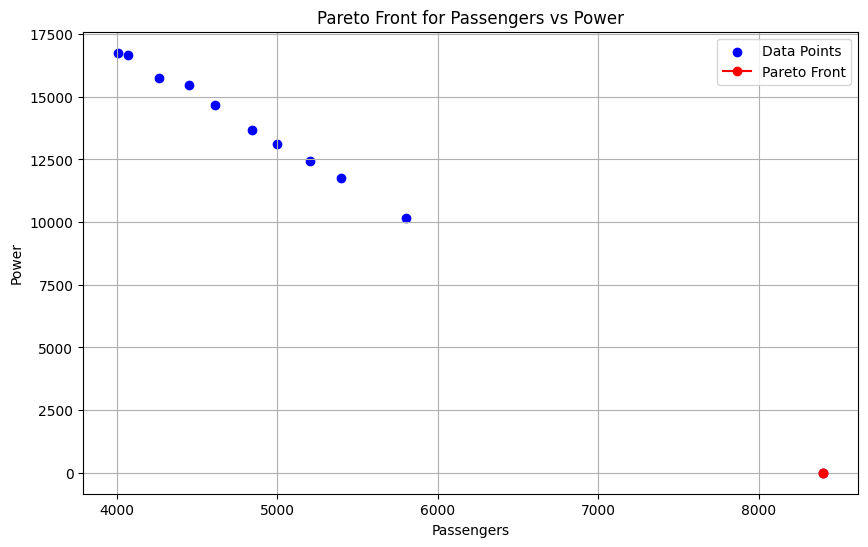

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually inputting the data from the image
data = {
    'Passengers': [8400, 5802, 5400, 4072, 5204, 4612, 4846, 4011, 4264, 5001, 4453],
    'Power': [0, 10161.11111, 11750, 16683.33333, 12444.44444, 14672.22222, 13688.88889, 16755.55556, 15738.88889, 13111.11112, 15450]
}
df = pd.DataFrame(data)

# Sort the data by 'Passengers'
df_sorted = df.sort_values('Passengers', ascending=False)

# Fixing the error by converting the row objects to dictionaries

# Create the Pareto front
pareto_front = [df_sorted.iloc[0].to_dict()]
for row in df_sorted.itertuples(index=False):
    row_dict = row._asdict()
    if row_dict['Power'] <= pareto_front[-1]['Power']:
        pareto_front.append(row_dict)

pareto_front_df = pd.DataFrame(pareto_front)

# Plot the data points and the Pareto front
plt.figure(figsize=(10, 6))
plt.scatter(df['Passengers'], df['Power'], color='blue', label='Data Points')
plt.plot(pareto_front_df['Passengers'], pareto_front_df['Power'], color='red', marker='o', linestyle='-', label='Pareto Front')
plt.xlabel('Passengers')
plt.ylabel('Power')
plt.title('Pareto Front for Passengers vs Power')
plt.legend()
plt.grid(True)
plt.show()